# Interactive maps with Bokeh

In [2]:
from bokeh.plotting import figure, save

In [3]:
p = figure(title='My first interactive map')

In [5]:
print p

Figure(id='87521bdb-07f9-467a-bd11-968e8474dd36', ...)


In [6]:
x_coord = [0,1,2,3,4]
y_coord = [5,4,1,2,0]

In [7]:
p.circle(x=x_coord,y=y_coord,size=10,color='red')

GlyphRenderer(id='cfc28afa-602a-446e-83ae-7d0251906e9c', ...)

In [10]:
outpf = './points.html'

In [11]:
save(obj=p,filename=outpf)

'C:\\Users\\andres\\points.html'

Creating interactive maps using Bokeh and Geopandas

In [55]:
import geopandas as gpd

In [15]:
points_fp = r"dataE5/dataE5/addresses.shp"

In [16]:
points = gpd.read_file(points_fp)

In [22]:
points.head()

,address,id,geometry
0,"Kampinkuja 1, 00100 Helsinki, Finland",1001,POINT (24.9301701 60.1683731)
1,"Kaivokatu 8, 00101 Helsinki, Finland",1002,POINT (24.9418933 60.1698665)
2,"Hermanstads strandsväg 1, 00580 Helsingfors, F...",1003,POINT (24.9774004 60.18735880000001)
3,"Itäväylä, 00900 Helsinki, Finland",1004,POINT (25.0919641 60.21448089999999)
4,"Tyynenmerenkatu 9, 00220 Helsinki, Finland",1005,POINT (24.9214846 60.1565781)


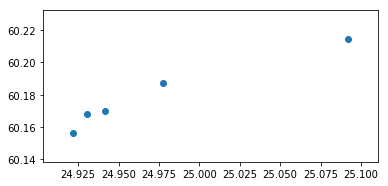

In [21]:
%matplotlib inline
points.head().plot()

In [23]:
def getPointCoords(row,geom,coord_type):
    """Calculates coordinates ('x' or 'y') of a Point geometry"""
    if coord_type == 'x':
        return row[geom].x
    elif coord_type == 'y':
        return row[geom].y

In [64]:
points['x'] = points.apply(getPointCoords,geom='geometry',coord_type='x',axis=1)

In [65]:
points['y'] = points.apply(getPointCoords,geom='geometry',coord_type='y',axis=1)

In [66]:
points.head()

,address,id,geometry,x,y
0,"Kampinkuja 1, 00100 Helsinki, Finland",1001,POINT (24.9301701 60.1683731),24.930170,60.168373
1,"Kaivokatu 8, 00101 Helsinki, Finland",1002,POINT (24.9418933 60.1698665),24.941893,60.169866
2,"Hermanstads strandsväg 1, 00580 Helsingfors, F...",1003,POINT (24.9774004 60.18735880000001),24.977400,60.187359
3,"Itäväylä, 00900 Helsinki, Finland",1004,POINT (25.0919641 60.21448089999999),25.091964,60.214481
4,"Tyynenmerenkatu 9, 00220 Helsinki, Finland",1005,POINT (24.9214846 60.1565781),24.921485,60.156578


In [67]:
p_df = points.drop('geometry',axis=1).copy()

In [29]:
p_df.head(2)

,address,id,x,y
0,"Kampinkuja 1, 00100 Helsinki, Finland",1001,24.930170,60.168373
1,"Kaivokatu 8, 00101 Helsinki, Finland",1002,24.941893,60.169866


In [30]:
from bokeh.models import ColumnDataSource

In [31]:
psource = ColumnDataSource(p_df)

In [32]:
type(psource)

bokeh.models.sources.ColumnDataSource

In [33]:
p = figure(title="A map of address points from a Shapefile")

In [44]:
p.circle('x', 'y', source=psource, color='red', size=10)

GlyphRenderer(id='2347adab-8139-49b0-ba11-93243a126523', ...)

In [35]:
outfp = r"./point_map.html"

In [36]:
save(p,outfp)

'C:\\Users\\andres\\point_map.html'

Adding interactivity to the map

In [37]:
from bokeh.models import HoverTool

In [45]:
my_hover = HoverTool()

In [39]:
type(my_hover)

bokeh.models.tools.HoverTool

In [50]:
my_hover.tooltips =  [('Address of the point', '@address'),('Id of the record','@id')]
p.add_tools(my_hover)

In [51]:
outfp = r"./point_map_hover.html"

In [52]:
save(p,outfp)

'C:\\Users\\andres\\point_map_hover.html'

Line map

In [53]:
metro_fp = 'dataE5/dataE5/metro.shp'

In [56]:
metro = gpd.read_file(metro_fp)

In [58]:
metro.head(2)

,NUMERO,SUUNTA,geometry
0,1300M,1,LINESTRING (2561676.997249531 6681346.00195433...
1,1300M,2,LINESTRING (2550919.001803585 6672692.00211347...


In [61]:
def getLineStringCoords(row,geom,coord_type):
    """Returns a list of coordinates ('x' or 'y') of a LineString geometry"""
    if coord_type == 'x':
        return list( row[geom].coords.xy[0] )
    elif coord_type == 'y':
        return list( row[geom].coords.xy[1] )

In [91]:
metro['x'] = metro.apply(getLineStringCoords, geom='geometry', coord_type='x', axis=1)
metro['y'] = metro.apply(getLineStringCoords, geom='geometry', coord_type='y', axis=1)

In [92]:
metro.head(2)

,NUMERO,SUUNTA,geometry,x,y
0,1300M,1,LINESTRING (2561676.997249531 6681346.00195433...,"[2561676.99725, 2560202.99715, 2560127.00005, ...","[6681346.00195, 6681016.99669, 6680969.99593, ..."
1,1300M,2,LINESTRING (2550919.001803585 6672692.00211347...,"[2550919.0018, 2551145.99913, 2551264.99836, 2...","[6672692.00211, 6672713.99715, 6672737.00241, ..."


In [93]:
m_df = metro.drop('geometry',axis=1).copy()

In [94]:
msource = ColumnDataSource(m_df)

In [95]:
p = figure(title="A map of the Helsinki metro")

In [96]:
p.multi_line('x','y',source=msource,color='red',line_width=3)

GlyphRenderer(id='c6827bb5-6dba-4e30-834e-8162b33da092', ...)

In [99]:
outfp = "./metro_map.html"

In [100]:
save(p,outfp)

'C:\\Users\\andres\\metro_map.html'

In [101]:
type(metro)

geopandas.geodataframe.GeoDataFrame

In [104]:
from bokeh.models import HoverTool

In [105]:
metro_hover = HoverTool()

In [106]:
metro_hover.tooltips = [('Number','@NUMERO')]

In [107]:
p.add_tools(metro_hover)

In [108]:
outfp = './metro_map_hover.html'

In [109]:
save(p,outfp)

'C:\\Users\\andres\\metro_map_hover.html'

In [111]:
metro.head(2)

,NUMERO,SUUNTA,geometry,x,y
0,1300M,1,LINESTRING (2561676.997249531 6681346.00195433...,"[2561676.99725, 2560202.99715, 2560127.00005, ...","[6681346.00195, 6681016.99669, 6680969.99593, ..."
1,1300M,2,LINESTRING (2550919.001803585 6672692.00211347...,"[2550919.0018, 2551145.99913, 2551264.99836, 2...","[6672692.00211, 6672713.99715, 6672737.00241, ..."


In [112]:
metro.count()

NUMERO      16
SUUNTA      16
geometry    16
x           16
y           16
dtype: int64

In [114]:
metro.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
NUMERO      16 non-null object
SUUNTA      16 non-null int64
geometry    16 non-null object
x           16 non-null object
y           16 non-null object
dtypes: int64(1), object(4)
memory usage: 420.0+ bytes


Polygon map with Points and Lines

Let’s visualize a map showing accessibility in Helsinki Region and place a metro line and the address points on top of that.

In [116]:
from bokeh.plotting import figure, save

In [117]:
from bokeh.models import ColumnarDataSource,HoverTool,LogColorMapper

In [118]:
import geopandas as gpd

In [119]:
import pysal as ps

In [120]:
grid_fp = r"dataE5/dataE5/TravelTimes_to_5975375_RailwayStation.shp"
point_fp = r"dataE5/dataE5/addresses.shp"
metro_fp = r"dataE5/dataE5/metro.shp"

In [121]:
grid = gpd.read_file(grid_fp)
points = gpd.read_file(point_fp)
metro = gpd.read_file(metro_fp)

In [122]:
CRS = grid.crs

In [123]:
CRS

{'init': u'epsg:3067'}

In [124]:
points['geometry'] = points['geometry'].to_crs(crs=CRS)
metro['geometry'] = metro['geometry'].to_crs(crs=CRS)

In [125]:
points['geometry'].head(1)

0    POINT (385149.4478367225 6671962.669661295)
Name: geometry, dtype: object

In [126]:
metro['geometry'].head(1)

0    LINESTRING (395534.7026002127 6679490.08463068...
Name: geometry, dtype: object

In [127]:
grid['geometry'].head(1)

0    POLYGON ((382000.0001358641 6697750.000038058,...
Name: geometry, dtype: object

In [128]:
def getPolyCoords(row, geom, coord_type):
    """Returns the coordinates ('x' or 'y') of edges of a Polygon exterior"""
    exterior = row[geom].exterior

    if coord_type == 'x':
        # Get the x coordinates of the exterior
        return list( exterior.coords.xy[0] )
    elif coord_type == 'y':
        # Get the y coordinates of the exterior
        return list( exterior.coords.xy[1] )

In [129]:
grid['x'] = grid.apply(getPolyCoords, geom='geometry', coord_type='x', axis=1)
grid['y'] = grid.apply(getPolyCoords, geom='geometry', coord_type='y', axis=1)

In [131]:
metro['x'] = metro.apply(getLineStringCoords, geom='geometry', coord_type='x', axis=1)
metro['y'] = metro.apply(getLineStringCoords, geom='geometry', coord_type='y', axis=1)

In [132]:
points['x'] = points.apply(getPointCoords, geom='geometry', coord_type='x', axis=1)
points['y'] = points.apply(getPointCoords, geom='geometry', coord_type='y', axis=1)

In [133]:
grid[['x', 'y']].head(2)

,x,y
0,"[382000.000136, 381750.000136, 381750.000136, ...","[6697750.00004, 6697750.00004, 6698000.00004, ..."
1,"[382250.000136, 382000.000136, 382000.000136, ...","[6697750.00004, 6697750.00004, 6698000.00004, ..."


In [134]:
grid = grid.replace(-1, 999)

In [135]:
breaks = [x for x in range(5, 200, 5)]

In [137]:
classifier = ps.User_Defined.make(bins=breaks)

In [139]:
pt_classif = grid[['pt_r_tt']].apply(classifier)

In [140]:
pt_classif.columns = ['pt_r_tt_ud']

In [141]:
grid = grid.join(pt_classif)

In [142]:
grid.head(2)

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,geometry,x,y,pt_r_tt_ud
0,32297,43,32260,48,5785640,32616,116,147,32616,108,139,5975375,32164,459,"POLYGON ((382000.0001358641 6697750.000038058,...","[382000.000136, 381750.000136, 381750.000136, ...","[6697750.00004, 6697750.00004, 6698000.00004, ...",27
1,32508,43,32471,49,5785641,32822,119,145,32822,111,133,5975375,29547,422,"POLYGON ((382250.0001358146 6697750.000038053,...","[382250.000136, 382000.000136, 382000.000136, ...","[6697750.00004, 6697750.00004, 6698000.00004, ...",26


In [143]:
m_df = metro.drop('geometry', axis=1).copy()
msource = ColumnDataSource(m_df)

In [144]:
p_df = points.drop('geometry', axis=1).copy()
psource = ColumnDataSource(p_df)

In [145]:
g_df = grid.drop('geometry', axis=1).copy()
gsource = ColumnDataSource(g_df)

In [146]:
from bokeh.palettes import RdYlBu11 as palette
from bokeh.models import LogColorMapper


In [147]:
color_mapper = LogColorMapper(palette=palette)

In [148]:
p = figure(title="Travel times with Public transportation to Central Railway station")

In [149]:
p.patches('x', 'y', source=gsource,
         fill_color={'field': 'pt_r_tt_ud', 'transform': color_mapper},
         fill_alpha=1.0, line_color="black", line_width=0.05)

GlyphRenderer(id='3205ddff-0bed-46d1-b790-58beed0bbf43', ...)

In [150]:
p.multi_line('x', 'y', source=msource, color="red", line_width=2)

GlyphRenderer(id='542b3621-4e28-4816-b351-82ed61bb13c9', ...)

In [151]:
p.circle('x', 'y', size=3, source=psource, color="black")

GlyphRenderer(id='cb8b9600-7a5d-4202-8029-9aacbfcf5c47', ...)

In [156]:
outfp = r"./travel_time_map.html"

In [157]:
save(p,outfp)

'C:\\Users\\andres\\travel_time_map.html'

Creating an advanced interactive map with Bokeh

In [247]:
from bokeh.palettes import YlOrRd as palette  #Spectral6 as palette
from bokeh.plotting import figure, save, output_file,show
from bokeh.models import ColumnDataSource, HoverTool, LogColorMapper
from bokeh.palettes import RdYlGn10 as palette 
import geopandas as gpd
import pysal as ps
import numpy as np


# Filepaths
fp = r"dataE5/dataE5/TravelTimes_to_5975375_RailwayStation.shp"
roads_fp = r"dataE5/dataE5/roads.shp"
metro_fp = r"dataE5/dataE5/metro.shp" 

# Read the data with Geopandas
data = gpd.read_file(fp)
roads = gpd.read_file(roads_fp)
metro = gpd.read_file(metro_fp)

# Ensure that the CRS is the same than in the all layers 
data['geometry'] = data['geometry'].to_crs(epsg=3067)
roads['geometry'] = roads['geometry'].to_crs(epsg=3067)
metro['geometry'] = metro['geometry'].to_crs(epsg=3067)


In [248]:
def getXYCoords(geometry, coord_type):
    """ Returns either x or y coordinates from  geometry coordinate sequence. Used with LineString and Polygon geometries."""
    if coord_type == 'x':
        return geometry.coords.xy[0]
    elif coord_type == 'y':
        return geometry.coords.xy[1]

def getPolyCoords(geometry, coord_type):
    """ Returns Coordinates of Polygon using the Exterior of the Polygon."""
    ext = geometry.exterior
    return getXYCoords(ext, coord_type)
    
def getLineCoords(geometry, coord_type):
    """ Returns Coordinates of Linestring object."""
    return getXYCoords(geometry, coord_type)

def getPointCoords(geometry, coord_type):
    """ Returns Coordinates of Point object."""
    if coord_type == 'x':
        return geometry.x
    elif coord_type == 'y':
        return geometry.y
    
def multiGeomHandler(multi_geometry, coord_type, geom_type):
    """ 
    Function for handling multi-geometries. Can be MultiPoint, MultiLineString or MultiPolygon. 
    Returns a list of coordinates where all parts of Multi-geometries are merged into a single list. 
    Individual geometries are separated with np.nan which is how Bokeh wants them. 
    # Bokeh documentation regarding the Multi-geometry issues can be found here (it is an open issue)
    # https://github.com/bokeh/bokeh/issues/2321
    """
    
    for i, part in enumerate(multi_geometry):
        # On the first part of the Multi-geometry initialize the coord_array (np.array)
        if i == 0:
            if geom_type == "MultiPoint":
                coord_arrays = np.append(getPointCoords(part, coord_type), np.nan)
            elif geom_type == "MultiLineString":
                coord_arrays = np.append(getLineCoords(part, coord_type), np.nan)
            elif geom_type == "MultiPolygon":
                coord_arrays = np.append(getPolyCoords(part, coord_type), np.nan)
        else:
            if geom_type == "MultiPoint":
                coord_arrays = np.concatenate([coord_arrays, np.append(getPointCoords(part, coord_type), np.nan)])
            elif geom_type == "MultiLineString":
                coord_arrays = np.concatenate([coord_arrays, np.append(getLineCoords(part, coord_type), np.nan)])
            elif geom_type == "MultiPolygon":
                coord_arrays = np.concatenate([coord_arrays, np.append(getPolyCoords(part, coord_type), np.nan)])
    
    # Return the coordinates 
    return coord_arrays
    

def getCoords(row, geom_col, coord_type):
    """
    Returns coordinates ('x' or 'y') of a geometry (Point, LineString or Polygon) as a list (if geometry is LineString or Polygon). 
    Can handle also MultiGeometries.
    """
    # Get geometry
    geom = row[geom_col]
    
    # Check the geometry type
    gtype = geom.geom_type
    
    # "Normal" geometries
    # -------------------
    
    if gtype == "Point":
        return getPointCoords(geom, coord_type)
    elif gtype == "LineString":
        return list( getLineCoords(geom, coord_type) )
    elif gtype == "Polygon":
        return list( getPolyCoords(geom, coord_type) )
        
    # Multi geometries
    # ----------------
    
    else:
        return list( multiGeomHandler(geom, coord_type, gtype) ) 

In [249]:
# Calculate the x and y coordinates of the grid
data['x'] = data.apply(getCoords, geom_col="geometry", coord_type="x", axis=1)
data['y'] = data.apply(getCoords, geom_col="geometry", coord_type="y", axis=1)

# Calculate the x and y coordinates of the roads
roads['x'] = roads.apply(getCoords, geom_col="geometry", coord_type="x", axis=1)
roads['y'] = roads.apply(getCoords, geom_col="geometry", coord_type="y", axis=1)

# Calculate the x and y coordinates of metro
metro['x'] = metro.apply(getCoords, geom_col="geometry", coord_type="x", axis=1)
metro['y'] = metro.apply(getCoords, geom_col="geometry", coord_type="y", axis=1)

In [250]:
# Replace No Data values (-1) with large number (999)
data = data.replace(-1, 999)

# Classify our travel times into 5 minute classes until 200 minutes
# Create a list of values where minumum value is 5, maximum value is 200 and step is 5.
breaks = [x for x in range(5, 200, 5)]

classifier = ps.User_Defined.make(bins=breaks)
pt_classif = data[['pt_r_tt']].apply(classifier)
car_classif = data[['car_r_t']].apply(classifier)

# Rename columns
pt_classif.columns = ['pt_r_tt_ud']
car_classif.columns = ['car_r_t_ud']

# Join back to main data
data = data.join(pt_classif)
data = data.join(car_classif)

# Create names for the legend (until 60 minutes)
upper_limit = 60
step = 5
# This will produce: ["0-5", "5-10", "10-15", ... , "60 <"]
names = ["%s-%s " % (x-5, x) for x in range(step, upper_limit, step)]
# Add legend label for over 60
names.append("%s <" % upper_limit)

# Assign legend names for the classes
data['label_pt'] = None
data['label_car'] = None

for i in range(len(names)):
    # Update rows where class is i
    data.loc[data['pt_r_tt_ud'] == i, 'label_pt'] = names[i]
    data.loc[data['car_r_t_ud'] == i, 'label_car'] = names[i]

# Update all cells that didn't get any value with "60 <"
data['label_pt'] = data['label_pt'].fillna("%s <" % upper_limit)
data['label_car'] = data['label_car'].fillna("%s <" % upper_limit)

In [251]:
# Select only necessary columns for our plotting to keep the amount of data minumum
df = data[['x', 'y', 'pt_r_tt_ud', 'pt_r_tt', 'car_r_t', 'from_id', 'label_pt']]
dfsource = ColumnDataSource(data=df)

# Exclude geometry from roads as well
rdf = roads[['x', 'y']]
rdfsource = ColumnDataSource(data=rdf)

# Exclude geometry from metro as well
mdf = metro[['x','y']]
mdfsource = ColumnDataSource(data=mdf)

TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

# Flip the colors in color palette
palette.reverse()
color_mapper = LogColorMapper(palette=palette)

p = figure(title="Travel times to Helsinki city center by public transportation", tools=TOOLS, 
           plot_width=650, plot_height=500, active_scroll = "wheel_zoom" ) 

# Do not add grid line 
p.grid.grid_line_color = None

# Add polygon grid and a legend for it 
grid = p.patches('x', 'y', source=dfsource, name="grid",
         fill_color={'field': 'pt_r_tt_ud','transform': color_mapper},
         fill_alpha=1.0, line_color="black", line_width=0.03, legend="label_pt")

# Add roads
r = p.multi_line('x', 'y', source=rdfsource, color="grey")

# Add metro
m = p.multi_line('x', 'y', source=mdfsource, color="red")

# Modify legend location
p.legend.location = "top_right"
p.legend.orientation = "vertical"

# Insert a circle on top of the Central Railway Station (coords in EurefFIN-TM35FIN)
station_x = 385752.214
station_y =  6672143.803
circle = p.circle(x=[station_x], y=[station_y], name="point", size=6, color="yellow")

# Add two separate hover tools for the data
phover = HoverTool(renderers=[circle])
phover.tooltips=[("Destination", "Railway Station")]

ghover = HoverTool(renderers=[grid])
ghover.tooltips=[("YKR-ID", "@from_id"),
                ("PT time", "@pt_r_tt"),
                ("Car time", "@car_r_t"),
               ]

p.add_tools(ghover)
p.add_tools(phover)

# Output filepath to HTML
output_file = r"./accessibility_map_Helsinki.html"


In [252]:
# Save the map
#output_file("accessibility_map_Helsinki.html")
save(p, output_file)
#show(p)

ValueError: Out of range float values are not JSON compliant: nan

In [ ]:
data.describe()

Bokeh nowadays support GeoJSONDataSource that makes it much easier to work and plot data from GeoDataFrame

In [ ]:
import geopandas as gpd
from bokeh.plotting import save, figure
from bokeh.models import GeoJSONDataSource

# Filepaths
fp = r"dataE5/dataE5/TravelTimes_to_5975375_RailwayStation.shp"
roads_fp = r"dataE5/dataE5/roads.shp"
metro_fp = r"dataE5/dataE5/metro.shp" 

# Read the data with Geopandas
data = gpd.read_file(fp)
roads = gpd.read_file(roads_fp)
metro = gpd.read_file(metro_fp)

# Ensure that the CRS is the same than in the all layers 
data['geometry'] = data['geometry'].to_crs(epsg=3067)
roads['geometry'] = roads['geometry'].to_crs(epsg=3067)
metro['geometry'] = metro['geometry'].to_crs(epsg=3067)

# Replace No Data values (-1) with large number (999)
data = data.replace(-1, 999)

# Classify our travel times into 5 minute classes until 200 minutes
# Create a list of values where minumum value is 5, maximum value is 200 and step is 5.
breaks = [x for x in range(5, 200, 5)]

classifier = ps.User_Defined.make(bins=breaks)
pt_classif = data[['pt_r_tt']].apply(classifier)
car_classif = data[['car_r_t']].apply(classifier)

# Rename columns
pt_classif.columns = ['pt_r_tt_ud']
car_classif.columns = ['car_r_t_ud']

# Join back to main data
data = data.join(pt_classif)
data = data.join(car_classif)

# Create names for the legend (until 60 minutes)
upper_limit = 60
step = 5
# This will produce: ["0-5", "5-10", "10-15", ... , "60 <"]
names = ["%s-%s " % (x-5, x) for x in range(step, upper_limit, step)]
# Add legend label for over 60
names.append("%s <" % upper_limit)

# Assign legend names for the classes
data['label_pt'] = None
data['label_car'] = None

for i in range(len(names)):
    # Update rows where class is i
    data.loc[data['pt_r_tt_ud'] == i, 'label_pt'] = names[i]
    data.loc[data['car_r_t_ud'] == i, 'label_car'] = names[i]

# Update all cells that didn't get any value with "60 <"
data['label_pt'] = data['label_pt'].fillna("%s <" % upper_limit)
data['label_car'] = data['label_car'].fillna("%s <" % upper_limit)

# Convert GeoDataFrames into GeoJSONDataSource objects (similar to ColumnDataSource)
data_source = GeoJSONDataSource(geojson=data.to_json())
roads_source = GeoJSONDataSource(geojson=roads.to_json())
metro_source = GeoJSONDataSource(geojson=metro.to_json())


# Initialize our plot figure
p = figure(title="A test map")


p.patches('x', 'y', source=data_source, name="grid",
         fill_color={'field': 'pt_r_tt_ud'},
         fill_alpha=1.0, line_color="black", line_width=0.03, legend="label_pt")

p.multi_line('xs', 'ys', source=roads_source, color='red', line_width=3)

p.multi_line('xs', 'ys', source=metro_source, color='gray', line_width=3)

# Output filepath
outfp = r"./test_map.html"

# Save the map
save(p, outfp)

In [178]:
data.head(2)

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,...,to_id,walk_d,walk_t,geometry,x,y,pt_r_tt_ud,car_r_t_ud,label_pt,label_car
0,32297,43,32260,48,5785640,32616,116,147,32616,108,...,5975375,32164,459,"POLYGON ((382000.0001358641 6697750.000038058,...","[382000.000136, 381750.000136, 381750.000136, ...","[6697750.00004, 6697750.00004, 6698000.00004, ...",27,9,60 <,45-50
1,32508,43,32471,49,5785641,32822,119,145,32822,111,...,5975375,29547,422,"POLYGON ((382250.0001358146 6697750.000038052,...","[382250.000136, 382000.000136, 382000.000136, ...","[6697750.00004, 6697750.00004, 6698000.00004, ...",26,9,60 <,45-50


In [186]:
data['pt_r_tt_ud'].value_counts()

8     1213
9     1195
10    1028
11     980
7      958
12     893
13     706
16     696
15     681
14     667
6      635
17     522
19     427
18     418
5      381
21     311
4      218
39     212
20     206
22     183
3      143
24     120
23     118
2       70
27      66
25      50
26      44
28      29
1       22
33      10
30       9
29       6
38       5
0        3
31       2
35       2
32       1
36       1
Name: pt_r_tt_ud, dtype: int64

In [180]:
from bokeh import __version__

In [181]:
__version__

u'0.12.13'

In [185]:
data['car_r_t_ud'].value_counts()

6     2747
7     2614
5     1979
8     1569
4     1163
9     1035
10     628
3      483
11     328
2      264
12     172
39      91
1       69
13      68
14      16
15       4
0        1
Name: car_r_t_ud, dtype: int64

In [195]:
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 13231 entries, 0 to 13230
Data columns (total 21 columns):
car_m_d       13231 non-null int64
car_m_t       13231 non-null int64
car_r_d       13231 non-null int64
car_r_t       13231 non-null int64
from_id       13231 non-null int64
pt_m_d        13231 non-null int64
pt_m_t        13231 non-null int64
pt_m_tt       13231 non-null int64
pt_r_d        13231 non-null int64
pt_r_t        13231 non-null int64
pt_r_tt       13231 non-null int64
to_id         13231 non-null int64
walk_d        13231 non-null int64
walk_t        13231 non-null int64
geometry      13231 non-null object
x             13231 non-null object
y             13231 non-null object
pt_r_tt_ud    13231 non-null int32
car_r_t_ud    13231 non-null int32
label_pt      13231 non-null object
label_car     13231 non-null object
dtypes: int32(2), int64(14), object(5)
memory usage: 1.8+ MB


In [196]:
data.head()

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,...,to_id,walk_d,walk_t,geometry,x,y,pt_r_tt_ud,car_r_t_ud,label_pt,label_car
0,32297,43,32260,48,5785640,32616,116,147,32616,108,...,5975375,32164,459,"POLYGON ((382000.0001358641 6697750.000038058,...","[382000.000136, 381750.000136, 381750.000136, ...","[6697750.00004, 6697750.00004, 6698000.00004, ...",27,9,60 <,45-50
1,32508,43,32471,49,5785641,32822,119,145,32822,111,...,5975375,29547,422,"POLYGON ((382250.0001358146 6697750.000038052,...","[382250.000136, 382000.000136, 382000.000136, ...","[6697750.00004, 6697750.00004, 6698000.00004, ...",26,9,60 <,45-50
2,30133,50,31872,56,5785642,32940,121,146,32940,113,...,5975375,29626,423,"POLYGON ((382500.0001357661 6697750.000038046,...","[382500.000136, 382250.000136, 382250.000136, ...","[6697750.00004, 6697750.00004, 6698000.00004, ...",26,11,60 <,60 <
3,32690,54,34429,60,5785643,33233,125,150,33233,117,...,5975375,29919,427,"POLYGON ((382750.0001357181 6697750.000038039,...","[382750.000136, 382500.000136, 382500.000136, ...","[6697750.00004, 6697750.00004, 6698000.00004, ...",28,11,60 <,60 <
4,31872,42,31834,48,5787544,32127,109,126,32127,101,...,5975375,31674,452,"POLYGON ((381250.0001360176 6697500.00003812, ...","[381250.000136, 381000.000136, 381000.000136, ...","[6697500.00004, 6697500.00004, 6697750.00004, ...",24,9,60 <,45-50
